In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")

# Display the first few rows of the dataset
print(df.head())

            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933


In [3]:
# Clean data
# Calculate the 2.5th and 97.5th percentiles
lower_limit = df["value"].quantile(0.025)
upper_limit = df["value"].quantile(0.975)

# Filter the dataset to keep only the values within the 2.5th and 97.5th percentiles
cleaned_df = df[(df["value"] >= lower_limit) & (df["value"] <= upper_limit)]

# Display the first few rows of the cleaned dataset
print(cleaned_df.head())

            value
date             
2016-05-19  19736
2016-05-26  18060
2016-05-27  19997
2016-05-28  19044
2016-05-29  20325


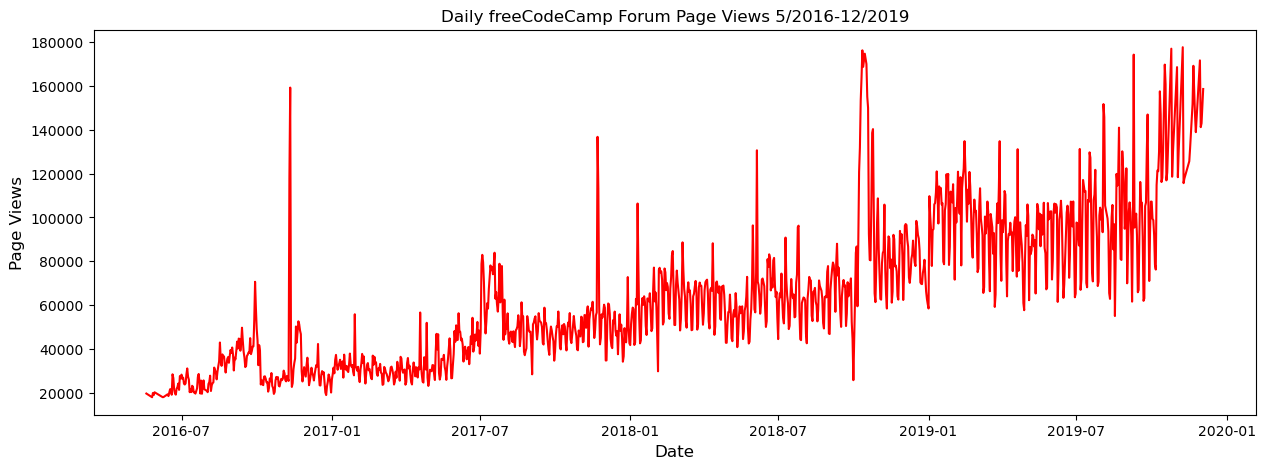

In [4]:
def draw_line_plot(data):
    # Create the plot
    fig, ax = plt.subplots(figsize=(15,5))
    line = ax.plot(data.index, data['value'], '-r')
    
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019", fontsize=12)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Page Views", fontsize=12)
    
    fig.savefig('line_plot.png')
    
draw_line_plot(cleaned_df)

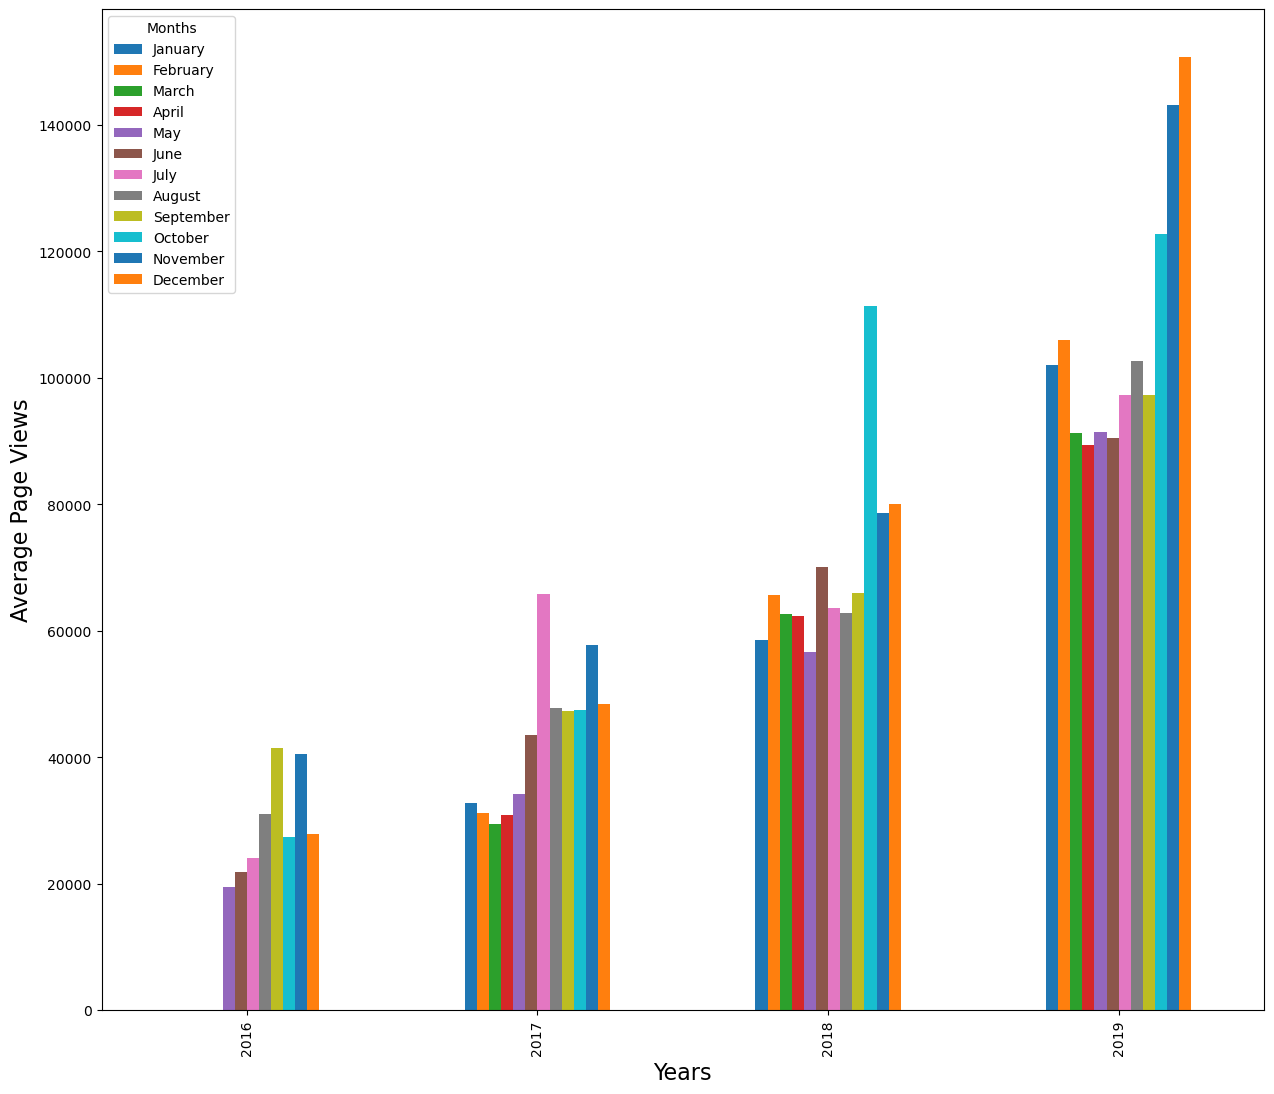

In [5]:
def draw_bar_plot(data):
    # Create a new DataFrame with monthly averages
    df_bar = data.copy()
    df_bar['Year'] = df_bar.index.year
    df_bar['Month'] = df_bar.index.month
    
    df_bar = df_bar.groupby(['Year', 'Month'])['value'].mean().unstack()

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(15,13))
    df_bar.plot(kind='bar', stacked= False,ax=ax)

    # Set labels and title
    plt.xlabel("Years", fontsize=16)
    plt.ylabel("Average Page Views", fontsize=16)
    # Customize the legend
    plt.legend(title="Months", labels=[
        "January", "February", "March", "April", "May", "June", 
        "July", "August", "September", "October", "November", "December"
    ])
    fig.savefig('bar_plot.png')
# Example usage:
draw_bar_plot(cleaned_df)

In [24]:
def draw_box_plot(data):
    # Prepare data for box plots (this part is done!)
        # Prepare data for box plots
    df_box = data.copy()
    #df_box['year'] = df_box.index.year
    #df_box['month'] = df_box.index.month
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box['Month Name'] = df_box.index.strftime('%b')  # For month names
    df_box = df_box.sort_values('month')  # Ensure months are in order
    
    #df_box = df.copy()
    #df_box.reset_index(inplace=True)
    #df_box['year'] = [d.year for d in df_box.date]
    #df_box['month'] = [d.strftime('%b') for d in df_box.date]


    # Set up the figure
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Year-wise Box Plot
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)", fontsize=12)
    axes[0].set_xlabel("Year", fontsize=12)
    axes[0].set_ylabel("Page Views", fontsize=12)

    # Month-wise Box Plot
    sns.boxplot(x='Month Name', y='value', data=df_box, order=[
        "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ], ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)", fontsize=12)
    axes[1].set_xlabel("Month", fontsize=12)
    axes[1].set_ylabel("Page Views", fontsize=12)

    # Adjust layout for clarity
    fig.savefig('box_plt.png')
    
draw_box_plot(cleaned_df)

AttributeError: 'DataFrame' object has no attribute 'year'